In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


# dataset 1 taken from here - https://newsdata.io/datasets

raw_df_1=pd.read_json('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/raw_data/dataset_from_internet/bloomberg_quint_news.json')
print(f"Length of raw dataframe = {len(raw_df_1)}")
raw_df_1.head(2)

Mounted at /content/gdrive
Length of raw dataframe = 7018


,url,title,short_description,author,date_created,date_modified,category,raw_description,description,publisher,scraped_at
0,https://www.bloombergquint.com/markets/all-you...,All You Need To Know Going Into Trade On Septe...,"Stocks in the news, big brokerage calls of the...",Darshan A Nakhwa,"23 Sep 2021, 7:05 AM IST","23 Sep 2021, 7:05 AM IST",Markets,"<div class=""story-element story-element-text"">...",Asian stocks were steady early Thursday after ...,https://www.bloombergquint.com/,2021-09-24 00:01:25
1,https://www.bloombergquint.com/business/bridge...,"Bridgestone CEO Backs Safe Tokyo Olympics, Dia...","Bridgestone CEO Backs Safe Tokyo Olympics, Dia...",Shiho Takezawa &,"23 Apr 2021, 5:35 AM IST","23 Apr 2021, 6:35 AM IST",Business,"<div class=""story-element story-element-text"">...",Bridgestone Corp. will support the Tokyo Olym...,https://www.bloombergquint.com/,2021-09-24 00:01:26


In [3]:
# dataset 2 taken from here - https://newsdata.io/datasets

raw_df_2=pd.read_json('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/raw_data/dataset_from_internet/bbc_news_list_uk.json')
print(f"Length of raw dataframe = {len(raw_df_2)}")
raw_df_2.head(2)

Length of raw dataframe = 15825


,tags,title,news_post_date,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
0,,Why quitting heroin substitute methadone is 'v...,2010-08-06T02:46:40.000Z,"<div data-component=""text-block"" class=""ssrcss...",The heroin substitute methadone can be used as...,https://www.bbc.co.uk/news/health-10869329,By Linda Pressly,en_GB,45cbcb62-840b-5a1d-9b59-d7f57f3ab7f6,Health,Heroin substitute methadone is used to wean ad...,BBC News,2021-05-02 17:19:39
1,"North Korea, Kim Jong-un, Kim Jong-il, Kim Jon...",North Korea leader's eldest son 'opposes dynasty',2010-10-12T08:54:42.000Z,"<div data-component=""text-block"" class=""ssrcss...",The eldest son of North Korean leader Kim Jong...,https://www.bbc.co.uk/news/world-asia-pacific-...,,en_GB,771b9c0d-88e1-589f-bf56-8ef80ce161a2,Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2021-05-02 17:19:39


In [4]:
# #merge raw data
# frames = [raw_df_1, raw_df_2]
# raw_df_concat = pd.concat(frames)
# raw_df = raw_df_concat.drop_duplicates(subset='title', keep='first') # remove duplicate rows
# raw_df.info()

# news_df = raw_df


news_df = raw_df_2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=a01f734088e7e20064e7c21cb9dce8a76dc2feadf051e2d6fec5bf192341f9d6
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


<Axes: >

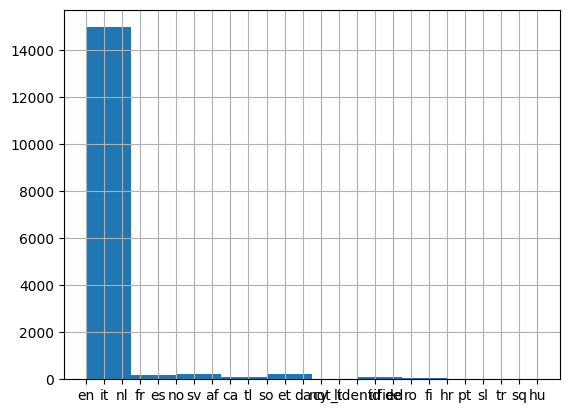

In [5]:
# There are still rows of news that are wrongly labelled as English, even if they are not in English.
# We check this through 'langdetect' python library
!pip install langdetect
from langdetect import detect, DetectorFactory

news_df['language'] = ""

DetectorFactory.seed = 0
for index, row in news_df.iterrows():
  title_str = str(row['title']) if not pd.isnull(row['title']) else '' # Convert 'title' to string and handle potential NaN values

  if len(title_str) > 3: # ensure that text has sufficient length for language detection
    news_df.at[index, 'language'] = detect(title_str) # Use langdetect on the string
  else:
    news_df.at[index, 'language'] = 'not_identified'

news_df.language.hist()

In [6]:
# hereonwards, only working on news with english language
news_df_en = news_df[news_df.language == 'en']
news_df_en = news_df_en.reset_index(drop=True)
print(len(news_df_en))
news_df_en.head(5)

14756


,tags,title,news_post_date,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
0,,Why quitting heroin substitute methadone is 'v...,2010-08-06T02:46:40.000Z,"<div data-component=""text-block"" class=""ssrcss...",The heroin substitute methadone can be used as...,https://www.bbc.co.uk/news/health-10869329,By Linda Pressly,en,45cbcb62-840b-5a1d-9b59-d7f57f3ab7f6,Health,Heroin substitute methadone is used to wean ad...,BBC News,2021-05-02 17:19:39
1,"North Korea, Kim Jong-un, Kim Jong-il, Kim Jon...",North Korea leader's eldest son 'opposes dynasty',2010-10-12T08:54:42.000Z,"<div data-component=""text-block"" class=""ssrcss...",The eldest son of North Korean leader Kim Jong...,https://www.bbc.co.uk/news/world-asia-pacific-...,,en,771b9c0d-88e1-589f-bf56-8ef80ce161a2,Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2021-05-02 17:19:39
2,,Paintings by gangster Reggie Kray go on sale i...,2010-10-27T17:35:24.000Z,"<div data-component=""text-block"" class=""ssrcss...",Seven oil paintings created by notorious gangs...,https://www.bbc.co.uk/news/uk-england-lincolns...,,en,768e3fc6-c406-5570-8328-2e6fb75abd1b,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,2021-05-02 17:19:39
3,,Bracklinn Falls Bridge hauled over gorge by hand,2010-10-08T13:21:50.000Z,"<div data-component=""text-block"" class=""ssrcss...",A 20-tonne bridge is being hauled into place b...,https://www.bbc.co.uk/news/uk-scotland-tayside...,,en,a6e26396-70ec-501c-8ebc-1d600ddf6aab,Tayside and Central Scotland,A 20-tonne bridge is having to be hauled into ...,BBC News,2021-05-02 17:19:39
4,,Manchester soldier's last words become song,2010-09-22T17:35:34.000Z,"<div data-component=""text-block"" class=""ssrcss...",The final words written by a guardsman killed ...,https://www.bbc.co.uk/news/uk-england-manchest...,,en,e8a150a5-b6e0-5315-9c04-fc639dee196f,Manchester,The final words written by a guardsman from Ma...,BBC News,2021-05-02 17:19:39


In [10]:
# topic modeling using embeddings based on https://github.com/ddangelov/Top2Vec
# (original paper - https://arxiv.org/abs/2008.09470)

%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

In [11]:
%%capture
from top2vec import Top2Vec

!python -m spacy download en_core_web_lg
import spacy

en = spacy.load("en_core_web_lg") #loading the english language large model of spacy

In [12]:
company_news_df = news_df_en.copy()
# company_news_df = company_news_df.rename(columns={"description": "news_content"})
company_news_df = company_news_df.rename(columns={"content": "news_content"})


for index, row in company_news_df.iterrows():
  content_str = str(row['news_content']) if not pd.isnull(row['news_content']) else '' # Convert 'news_content' to string and handle potential NaN values
  row["news_content"] = content_str

news_content_list_en = company_news_df.news_content.tolist() # take news_content column in a list to feed to the model
news_content_list_en_processed = [] # empty list to collect news items from 'news_content_list_en' after removing stop words

sw_spacy = en.Defaults.stop_words # stop words present in the Spacy library

for text in news_content_list_en: # removing stop words from 'news_content_list_en' and collecting news items in 'news_content_list_en_processed'
  words = [word for word in text.split() if word.lower() not in sw_spacy]
  new_text = " ".join(words)
  news_content_list_en_processed.append(new_text)

print(len(news_content_list_en_processed))

14756


In [13]:
model = Top2Vec(documents = news_content_list_en_processed, speed = "deep-learn") # implementing Top2Vec model

number_of_topics = model.get_num_topics() # this returns the number of topics that Top2Vec has found in the data.
number_of_topics

INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Creating joint document/word embedding
INFO:top2vec:Creating lower dimension embedding of documents
INFO:top2vec:Finding dense areas of documents
INFO:top2vec:Finding topics


104

In [14]:
topic_sizes, topic_nums = model.get_topic_sizes() # This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
topic_words, word_scores, topic_nums = model.get_topics(number_of_topics) # this returns the topics in decreasing size.

topic_df = pd.DataFrame(topic_sizes, topic_nums)
topic_df = topic_df.reset_index()
topic_df.columns = ["topic_nums", "topic_sizes"]
topic_df["topic_words"] = topic_words.tolist()
topic_df["word_scores"] = word_scores.tolist()
topic_df.head()

,topic_nums,topic_sizes,topic_words,word_scores
0,0,2407,"[policeman, arrests, police, policemen, crimes...","[0.30132144689559937, 0.2965456247329712, 0.29..."
1,1,615,"[hospitals, nurses, healthcare, patients, hosp...","[0.28233134746551514, 0.24198618531227112, 0.2..."
2,2,569,"[accidents, accident, incidents, ambulance, in...","[0.32800358533859253, 0.3183686137199402, 0.28..."
3,3,527,"[firefighters, fires, arson, fire, evacuated, ...","[0.3693495988845825, 0.3689005970954895, 0.367..."
4,4,421,"[councils, councillors, council, neighbourhood...","[0.24972015619277954, 0.23922154307365417, 0.2..."


### Demo:

In [15]:
#  let's search for topics most similar to any keyword

key_topic_words, key_word_scores, key_topic_scores, key_topic_nums = model.search_topics(keywords=["research"], num_topics = min(number_of_topics,5))
print(key_topic_nums)
print(key_topic_scores)

[ 8 71 61 42 65]
[0.42109927 0.14669042 0.11934829 0.07579014 0.06743359]


In [16]:
news_content_list_en_processed[431]

'brother south Belfast man murdered seven years ago begun leaflet campaign find killers. John Barr, 51, found dead Hatfield Street home lower Ormeau Road area April 2003. Charges dropped people accused mrdering him. 70-year-old brother, Tim, says hopeful distributing 1,000 leaflets area jog someone\'s memory prick conscience killers. "I\'m hopeful wait. \'I can\'t anymore head\'. "Seven years passed; police tell cases solved 20 years, good me? I\'ll dead then, rest brothers sisters dead."Police said time "protracted violent attack". Mr Barr said killing brother hard understand. "He fella lived took drink; fighter quiet, neighbours tell you. "It\'s hard live with; it\'s head day. "Nobody idea murdered. Maybe row went wrong, brother wasn\'t fighter. It\'s big mystery us. "I don\'t think done. You\'re left waiting police."In statement, police said crime branch\'s investigation murder John Barr "live ongoing". "Officers examining number potential lines enquiry," added.'

In [17]:
news_content_list_en[431]

'The brother of a south Belfast man murdered seven years ago has begun a leaflet campaign to find the killers. John Barr, 51, was found dead in his Hatfield Street home in the lower Ormeau Road area in April 2003. Charges were dropped against two people accused of mrdering him. His 70-year-old brother, Tim, says he is hopeful that distributing more than 1,000 leaflets in the area may jog someone\'s memory or prick the conscience of his killers. "I\'m hopeful but all we can do is wait. Whoever did this may say \'I can\'t take this anymore in my head\'. "Seven years have passed; police would tell you cases have been solved after 20 years, but what good is that to me? I\'ll be dead then, the rest of my brothers and sisters will be dead."Police said at the time it had been a "protracted and quite a violent attack". Mr Barr said the killing of his brother was hard to understand. "He was a fella who lived on his own and took a drink; he was never a fighter and was very quiet, as any of his n

In [18]:
# let's search documents that belong to the topic with max score.

documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=key_topic_nums[0], num_docs = min(10, topic_df.loc[topic_df["topic_nums"]==key_topic_nums[0], "topic_sizes"].iloc[0]))
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    # print(doc)
    print(news_content_list_en[doc_id])
    print("-----------")
    print()

Document: 14462, Score: 1.000000238418579
-----------

-----------

Document: 13886, Score: 1.000000238418579
-----------

-----------

Document: 14078, Score: 1.000000238418579
-----------

-----------

Document: 14238, Score: 1.000000238418579
-----------

-----------

Document: 12734, Score: 1.000000238418579
-----------

-----------

Document: 13950, Score: 1.000000238418579
-----------

-----------

Document: 13982, Score: 1.000000238418579
-----------

-----------

Document: 12415, Score: 1.000000238418579
-----------

-----------

Document: 14747, Score: 1.0000001192092896
-----------

-----------

Document: 13773, Score: 1.0000001192092896
-----------

-----------



In [19]:
# let's search documents for content semantically similar to MULTIPLE KEYWORDS.

documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["research", "price"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(news_content_list_en[doc_id])
    print("-----------")
    print()

Document: 14559, Score: 0.527213117159677
-----------

-----------

Document: 12415, Score: 0.527213117159677
-----------

-----------

Document: 14079, Score: 0.5272130798407352
-----------

-----------

Document: 383, Score: 0.5272130384328939
-----------

-----------

Document: 14335, Score: 0.5272130384328939
-----------

-----------

